In [15]:
import numpy as np
import matplotlib.pyplot as plt

There are many different metrics that we can use in machine learning to evaluate the performance of a machine learning algorithm.  This notebook provides a summary of some of the most common ones encountered in typical machine learning applications, with all metrics coded from scratch.

## Statistical Measures

Before we proceed to anything else, here are a few statistical helper functions that we can either use in conjunction with a particular metric or use by itself: 

### 1. Mean 

The mean is simply the total sum of values in a list divided by the length of the list: 

In [1]:
def mean(list1):
    return sum(list1) / len(list1)

In [2]:
mean([1, 3, 5, 7])

4.0

### 2. Variance 

The variance is simply the expectation of the squared deviation of a random variable from its mean.  Informally, this means how spread out a set of some numbers are from their average value.  Sample variance is divided by `n-1` instead of `n` in order to remain an unbiased estimator of the population variance.  The sample variance is defined as:

$ S^{2} = \frac{\Sigma (x_{i} - \bar{x})^{2}}{n-1}$

In [7]:
def variance(list1):
    return sum((xi - mean(list1)) ** 2 for xi in list1) / len(list1) - 1   

In [8]:
variance([1, 3, 5, 7])

4.0

### 3. Standard Deviation 

The standard deviation is the square root of the variance and is also a measure of the spread of a set of some numbers from their average value, but unlike the variance, the standard deviation is expressed in the same units as the mean.  The sample standard deviation is defined as:

$\sigma = \sqrt{\frac{\Sigma (x_{i} - \bar{x})^{2}}{n-1}}$

In [9]:
def standard_deviation(list1):
    return (sum((xi - mean(list1)) ** 2 for xi in list1) / len(list1) - 1) ** 0.5

In [10]:
standard_deviation([1, 3, 5, 7])

2.0

## Classification 

The most common metrics for classification include: 
- Accuracy
- Precision
- Recall
- F1 Score
- Area under the ROC curve
- Log loss

Before proceding to the listed metrics, it is convenient if we define four helper functions first.  The results of a binary classification prediction have four possible outcomes: true positive (TP), true negative (TP), false positive (FP), or false negative (FN).  We can then use these to define the metrics we will use. 

In [37]:
def true_positive(y_true, y_pred): 
    tp = 0
    for yt, yp in zip(y_true, y_pred):
        if yt == 1 and yp == 1: 
            tp += 1
    return tp

def true_negative(y_true, y_pred):
    tn = 0
    for yt, yp in zip(y_true, y_pred):
        if yt == 0 and yp == 0:
            tn += 1
    return tn

def false_positive(y_true, y_pred):
    fp = 0
    for yt, yp in zip(y_true, y_pred):
        if yt == 0 and yp == 1:
            fp += 1
    return fp

def false_negative(y_true, y_pred):
    fn = 0
    for yt, yp in zip(y_true, y_pred):
        if yt == 1 and yp == 0:
            fn += 1
    return fn

### 1. Accuracy 

Accuracy is defined as the number of true positives divided by the total number of true positives and true negatives:

Accuracy = $\frac{TP + TN}{TP + TN + FP + FN}$

In [34]:
def accuracy(y_true, y_pred):
    tp = true_positive(y_true, y_pred)
    fp = false_positive(y_true, y_pred)
    fn = false_negative(y_true, y_pred)
    tn = true_negative(y_true, y_pred)
    accuracy_score = (tp + tn) / (tp + tn + fp + fn)
    return accuracy_score

In [38]:
l1 = [0, 1, 1, 1, 0, 0, 0, 1]
l2 = [0, 1, 0, 1, 0, 1, 0, 0]
accuracy(l1, l2)

0.625

### 2. Precision 

Precision is a metric often used in cases where accuracy does not provide useful information about the misclassifications, particularly when imbalanced classes are present.  It is defined as the number of true positives divided by the total number of true and false positives: 

Precision = $\frac{TP}{TP + FP}$

In [39]:
def precision(y_true, y_pred):
    tp = true_positive(y_true, y_pred)
    fp = false_positive(y_true, y_pred)
    precision_score = tp / (tp + fp)
    return precision_score

In [40]:
l1 = [0, 1, 1, 1, 0, 0, 0, 1]
l2 = [0, 1, 0, 1, 0, 1, 0, 0]
precision(l1, l2)

0.6666666666666666

### 3. Recall 

Recall is defined as the number of true positives divided by the total number of true positives and false negatives:

Recall = $\frac{TP}{TP + FN}$

In [41]:
def recall(y_true, y_pred):
    tp = true_positive(y_true, y_pred)
    fn = false_negative(y_true, y_pred)
    recall_score = tp / (tp + fn)
    return recall_score

In [43]:
l1 = [0, 1, 1, 1, 0, 0, 0, 1]
l2 = [0, 1, 0, 1, 0, 1, 0, 0]
recall(l1, l2)

0.5

### 4. F1 Score

The F1 score is a metric that combines precision and recall together.  It is mathematically defined as the harmonic mean of precision and recall: 

F1 = $\frac{2PR}{P + R} = \frac{2TP}{2TP + FP + FN}$

In [44]:
def f1(y_true, y_pred):
    p = precision(y_true, y_pred)
    r = recall(y_true, y_pred)
    f1_score = 2 * p * r / (p + r)
    return f1_score

In [45]:
l1 = [0, 1, 1, 1, 0, 0, 0, 1]
l2 = [0, 1, 0, 1, 0, 1, 0, 0]
f1(l1, l2)

0.5714285714285715

### 5. Area under ROC Curve

Before continuing further, let's stop for a second and define a few other functions.  Another common name one sees when looking at classification metrics is the **true positive rate**, or TPR.  This is synonymous and identical to recall or sensitivity, but different names for these are used in different contexts.  This is again defined as:

TPR = $\frac{TP}{TP + FN}$

In [46]:
def tpr(y_true, y_pred):
    return recall(y_true, y_pred)

The **false positive rate**, or FPR, is defined as: 

FPR = $\frac{FP}{TN + FP}$

In [47]:
def fpr(y_true, y_pred):
    fp = false_positive(y_true, y_pred)
    tn = true_negative(y_true, y_pred)
    return fp / (tn + fp)

To see how these are useful, consider a binary classifier where we have 15 samples and binary target values along with the predicted probabilities of when a sample is positive. Normally, we choose 0.5 as a threshold for binary classification.  But what's to stop us from choosing any threshold between 0 and 1? We can still evaluate the precision, recall, F1, etc. regardless of whichever threshold we choose.  Let's try using only TPR and FPR: 

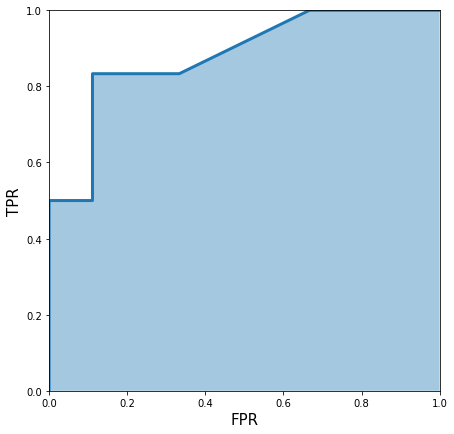

In [54]:
tpr_values = []
fpr_values = []

# Actual targets
y_true = [0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1]

# Predicted probabilities of a sample being 1
y_pred = [0.1, 0.3, 0.2, 0.6, 0.4, 0.8, 0.9, 0.5, 0.3, 0.95, 0.3, 0.8, 0.85, 0.15, 0.99]

# Designated thresholds
thresholds = [0, 0.1, 0.2, 0.3, 0.5, 0.5, 0.5, 0.7, 0.8, 0.85, 0.9, 0.99, 1.0]

for thresh in thresholds:
    temp_pred = [1 if x >= thresh else 0 for x in y_pred]
    temp_tpr = tpr(y_true, temp_pred)
    temp_fpr = fpr(y_true, temp_pred)
    tpr_values.append(temp_tpr)
    fpr_values.append(temp_fpr)
    
plt.figure(figsize=(7, 7))
plt.fill_between(fpr_values, tpr_values, alpha=0.4)
plt.plot(fpr_values, tpr_values, lw=3)
plt.xlim(0, 1.0)
plt.ylim(0, 1.0)
plt.xlabel('FPR', fontsize=15)
plt.ylabel('TPR', fontsize=15)
plt.show()

The value we care about here if the area under the curve of the plot shown above.  We could write it from scratch, but it is much more convenient to just use the scikit-learn implementation of it: 

In [53]:
from sklearn.metrics import roc_auc_score
y_true = [0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1]
y_pred = [0.1, 0.3, 0.2, 0.6, 0.4, 0.8, 0.9, 0.5, 0.3, 0.95, 0.3, 0.8, 0.85, 0.15, 0.99]
roc_auc_score(y_true, y_pred)

0.9074074074074074

What does the score mean? If we get a score of 0.90 as we did above, this basically means that if we select a random sample from our dataset that is a positive sample and a random sample that is negative, the positive sample will rank higher than the negative sample with probability 0.90.  

### 6. Log-loss

For the case of binary classification, the log-loss is defined as: 

*Log-loss*  = *-1.0 * (target * log(prediction) + (1 - target) * log(1 - prediction)*

The log-loss generally penalizes much higher than many other classification metrics. 

In [57]:
def log_loss(y_true, y_pred):
    epsilon = 1e-15
    loss = []
    for yt, yp in zip(y_true, y_pred):
        yp = np.clip(yp, epsilon, 1 - epsilon)
        temp_loss = -1.0 * (yt * np.log(yp) + (1 - yt) * np.log(1 - yp))
        loss.append(temp_loss)
    return sum(loss) / len(loss)

In [58]:
y_true = [0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1]
y_pred = [0.1, 0.3, 0.2, 0.6, 0.4, 0.8, 0.9, 0.5, 0.3, 0.95, 0.3, 0.8, 0.85, 0.15, 0.99]
log_loss(y_true, y_pred)

0.4397925137338295

## Regression 

The most common form of metrics in regression is **error**.  Error is simply something analagous to the following: 

*Error* = *True Value - Predicted Value*

The most common metrics for regression include: 
- Mean absolute error (MAE)
- Mean squared error (MSE)
- Root mean squared error (RMSE)
- Mean squared logarithmic error (MSLE)
- Root mean squared logarithmic error (RMSLE)
- Mean percentage error (MPE)
- Mean absolute percentage error (MAPE)
- R^2

### 1. Mean absolute error (MAE)

This is defined simply as the mean value of all absolute errors.  

In [16]:
def mean_absolute_error(y_true, y_pred):
    error = 0
    for yt, yp in zip(y_true, y_pred):
        error += np.abs(yt - yp)
    return error / len(y_true)

In [17]:
l1 = [5, 8, 4, 3]
l2 = [6, 5, 4, 6]
mean_absolute_error(l1, l2)

1.75

### 2. Mean squared error (MSE)

Similarly to MAE, the squared error is defined as:

*Squared Error = (True Value - Predicted Value)*^2

and the mean squared error is simply the mean value of this.

In [18]:
def mean_squared_error(y_true, y_pred):
    error = 0
    for yt, yp in zip(y_true, y_pred):
        error += (yt - yp) ** 2
    return error / len(y_true)

In [19]:
l1 = [5, 8, 4, 3]
l2 = [6, 5, 4, 6]
mean_squared_error(l1, l2)

4.75

### 3. Root mean squared error (RMSE)

The root mean squared error is just the square root of the MSE.  MSE and RMSE are the most popular metrics typically used to evaluate regression models.  

*RMSE = SQRT(MSE)*

In [20]:
def rmse(y_true, y_pred):
    error = 0
    for yt, yp in zip(y_true, y_pred):
        error += (yt - yp) ** 2
    return (error / len(y_true)) ** 0.5

In [21]:
l1 = [5, 8, 4, 3]
l2 = [6, 5, 4, 6]
rmse(l1, l2)

2.179449471770337

### 4. Mean squared logarithmic error (MSLE)

MSLE is a variation of MSE and can be interpreted as a measure of the ratio between the true and predicted values. The introduction of the logarithm makes MSLE only care about the relative difference between the true and the predicted value, or in other words, it only cares about the percentual difference between them.
This means that MSLE will treat small differences between small true and predicted values approximately the same as big differences between large true and predicted values. The squared logarithmic error is:

$ \Sigma((log(1 + y_{i}) - log(1 + \hat{y}))^{2}$

In [23]:
def msle(y_true, y_pred):
    error = 0
    for yt, yp in zip(y_true, y_pred):
        error += (np.log(1 + yt) - np.log(1 + yp)) ** 2
    return error / len(y_true)

In [24]:
l1 = [5, 8, 4, 3]
l2 = [6, 5, 4, 6]
msle(l1, l2)

0.12533355402273888

### 5. Root mean squared logarithmic error (RMSLE)

This is simply the quare root of the MSLE:

*RMSLE = SQRT(MSLE)*

In [25]:
def rmsle(y_true, y_pred):
    error = 0
    for yt, yp in zip(y_true, y_pred):
        error += (np.log(1 + yt) - np.log(1 + yp)) ** 2
    return (error / len(y_true)) ** 0.5

In [26]:
l1 = [5, 8, 4, 3]
l2 = [6, 5, 4, 6]
rmsle(l1, l2)

0.3540247929492211

### 6. Mean percentage error (MPE)

The percentage error is the difference between the true and predicted value, divided by the true value, then multiplied by 100 to convert into a percentage. 

*Percentage Error = ((True Value - Predicted Value) / True Value) * 100*

In [27]:
def mean_percentage_error(y_true, y_pred):
    error = 0
    for yt, yp in zip(y_true, y_pred):
        error += (yt - yp) / yt
    return error / len(y_true)

In [28]:
l1 = [5, 8, 4, 3]
l2 = [6, 5, 4, 6]
mean_percentage_error(l1, l2)

-0.20625

 ### 7.  Mean absolute percentage error (MAPE)
 
 This is somewhat more common than MPE and is just an absolute value version of it.

In [29]:
def mape(y_true, y_pred):
    error = 0
    for yt, yp in zip(y_true, y_pred):
        error += np.abs(yt - yp) / yt
    return error / len(y_true)

In [30]:
l1 = [5, 8, 4, 3]
l2 = [6, 5, 4, 6]
mape(l1, l2)

0.39375

 ### 8.  R^2

R^2 is one of the most common metrics in regression and basically is a measure of how well our model fits the data.  A value closer to 1 implies a better fit, with 1 being the maximum value. R^2 is defined mathematically as 1 - RSS / TSS:

$R^{2} = 1 - \frac{\Sigma (y_{t}-y_{p})^{2}}{\Sigma (y_{t}-\bar{y})^{2}}$

So when the RSS is minimized for a given TSS, we get a value closer to one.  It should be noted that this is the **unadjusted** form of R^2, which does not penalize for a large number of useless features in a model.  As we add features to a regression model, R^2 increases regardless if our model is truly capturing the structure in the data better or not, since there are more ways to fit it with increased features.  For this reason, adjusted R^2 is often used, but is not shown here.  

In [31]:
def r_squared(y_true, y_pred):
    numerator = 0
    denominator = 0
    for yt, yp in zip(y_true, y_pred):
        numerator += (yt - yp) ** 2
        denominator += (yt - mean(y_true)) ** 2
    ratio = numerator / denominator
    return 1 - ratio

In [32]:
y_true = [3, -0.5, 2, 7]
y_pred = [2.5, 0.0, 2, 8]
r_squared(y_true, y_pred)

0.9486081370449679